Tabular Playground Series July (Kaggle Competition) 2022 Submission Notebook. Score :- 0.07018. 

# **Importing Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

**Importing the dataset**

In [2]:
df = pd.read_csv('../input/tabular-playground-series-jul-2022/data.csv')

In [3]:
df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [4]:
df.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,...,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,48999.500000,0.001220,0.005580,-0.001042,-0.000700,-0.003522,-0.001612,-0.003042,5.545918,6.763061,...,-0.004513,-0.000515,-0.001670,-0.038752,-0.220002,0.166434,-0.064309,-0.062540,0.098472,-0.230910
std,28290.307527,1.002801,1.000742,1.001373,1.000422,1.003061,1.000532,0.997434,3.691840,4.152348,...,1.004372,1.002962,0.999703,1.477858,1.494836,1.543014,1.576086,1.428055,1.305407,1.528476
min,0.000000,-4.732235,-4.202795,-4.377021,-4.010826,-4.535903,-4.300767,-4.894525,0.000000,0.000000,...,-4.894525,-4.732235,-4.438130,-6.873999,-8.234305,-7.792363,-6.593842,-7.375719,-7.335556,-6.954151
25%,24499.750000,-0.675226,-0.670985,-0.672779,-0.672540,-0.682510,-0.675066,-0.680421,3.000000,4.000000,...,-0.678773,-0.679777,-0.675147,-1.022964,-1.203204,-0.903385,-1.128966,-0.975680,-0.746489,-1.262606
50%,48999.500000,0.002022,0.006650,-0.000324,-0.003185,-0.003307,0.001024,-0.002053,5.000000,6.000000,...,-0.000587,-0.000806,0.000819,-0.056687,-0.219046,0.167074,-0.099221,-0.070852,0.082230,-0.271319
75%,73499.250000,0.677271,0.677746,0.677086,0.672097,0.677589,0.673344,0.668112,8.000000,9.000000,...,0.672149,0.675437,0.676881,0.930158,0.764690,1.217432,0.987684,0.843212,0.925306,0.770516
max,97999.000000,4.490521,4.324974,4.560247,4.399373,4.050549,4.710316,3.998595,32.000000,30.000000,...,4.560247,4.399373,4.135419,6.517721,6.054831,7.527271,7.544731,7.005608,7.205971,6.977150


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98000 entries, 0 to 97999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      98000 non-null  int64  
 1   f_00    98000 non-null  float64
 2   f_01    98000 non-null  float64
 3   f_02    98000 non-null  float64
 4   f_03    98000 non-null  float64
 5   f_04    98000 non-null  float64
 6   f_05    98000 non-null  float64
 7   f_06    98000 non-null  float64
 8   f_07    98000 non-null  int64  
 9   f_08    98000 non-null  int64  
 10  f_09    98000 non-null  int64  
 11  f_10    98000 non-null  int64  
 12  f_11    98000 non-null  int64  
 13  f_12    98000 non-null  int64  
 14  f_13    98000 non-null  int64  
 15  f_14    98000 non-null  float64
 16  f_15    98000 non-null  float64
 17  f_16    98000 non-null  float64
 18  f_17    98000 non-null  float64
 19  f_18    98000 non-null  float64
 20  f_19    98000 non-null  float64
 21  f_20    98000 non-null  float64
 22

In [6]:
train_data = df.drop(['id'],1)
train_data.shape

(98000, 29)

In [7]:
Xtrain=train_data

In [8]:
print(df.isnull().sum().sum())

0


**Cool.. so there's no null value. Let's see the correlation amongst features.**

<AxesSubplot:>

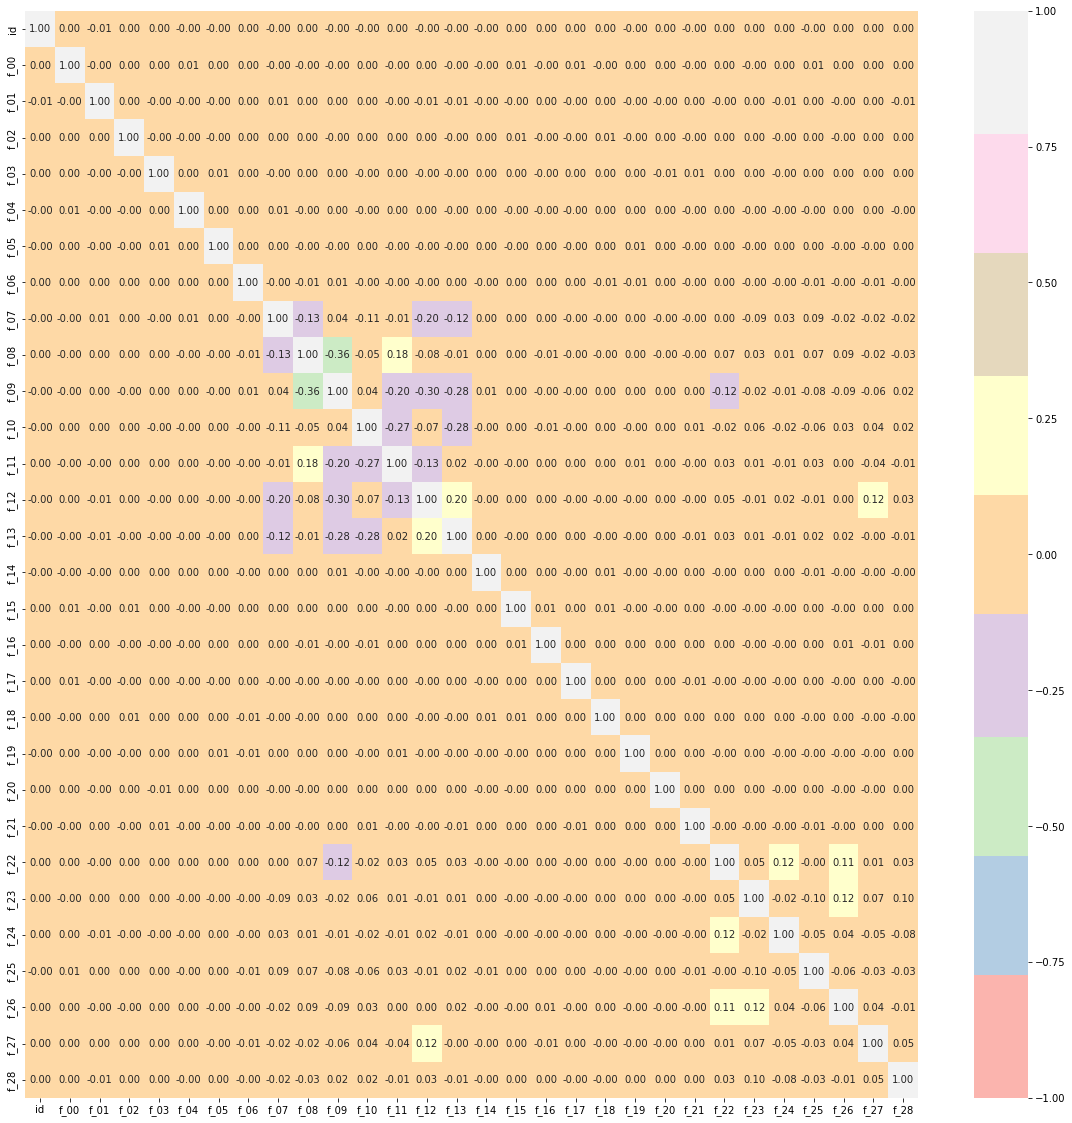

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(data=df.corr(),vmin=-1, vmax=+1,center=0,annot=True, cmap='Pastel1', fmt='.2f')

**There's hardly any correlation. Moving ahead with Scaling the df**

In [10]:
sc = RobustScaler()
Xtrain_scaled = sc.fit_transform(Xtrain)

Text(0.5, 1.0, 'Distribution of mean per row')

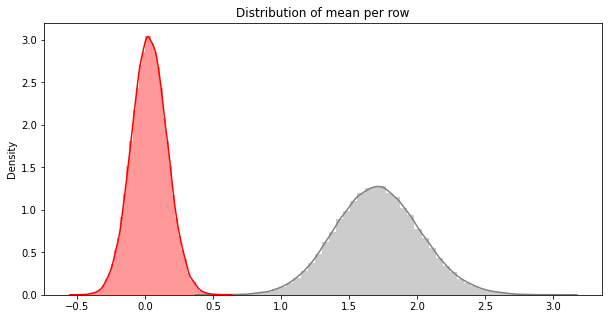

In [11]:
Features = Xtrain.columns.values
a=Xtrain
b=Xtrain_scaled
plt.figure(figsize=(10,5))
sns.distplot(a.mean(axis=1), color='grey', kde=True, label='train')
sns.distplot(b.mean(axis=1), color='red', kde=True, label='train_scaled')
plt.title('Distribution of mean per row')

**The Mean and Standard Deviation is in red colour after scaling. The one in grey is without scaling**

Text(0.5, 1.0, 'Distribution of std per row')

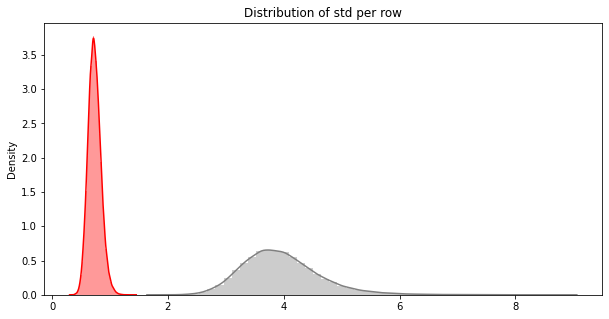

In [12]:
plt.figure(figsize=(10,5))
sns.distplot(a.std(axis=1), color='grey', kde=True, label='train')
sns.distplot(b.std(axis=1), color='red', kde=True, label='train_scaled')
plt.title('Distribution of std per row')

**Now we can apply PCA on th scaled data.**

In [13]:
pca = PCA(random_state = 10, whiten = True)
X_pca = pca.fit_transform(Xtrain_scaled)

I have used Mini Batch K-Means after a long Trail and Error on other algorithms. I've used Affinity Propagation, Agglomerative Clustering, Birch Clustering, DBSCAN, K-Means, Mean Shift, OPTICS, Spectral Clustering, Guassian mix and finally Bayesian Guassian Mixture but they either took a long time to execute or just filled the kaggle's memory and threw errors. Also n_cluster = 10 comes after trial and error on the model.

In [14]:
model = MiniBatchKMeans(n_clusters=10)
pred = model.fit_predict(X_pca)
pred

array([3, 9, 1, ..., 6, 2, 3], dtype=int32)

In [15]:
df= pd.DataFrame({"x" : X_pca[:,0],"y" : X_pca[:,1],"clusters" : pred})

[Text(0.5, 1.0, 'Clusters made by model with their centers marked in black')]

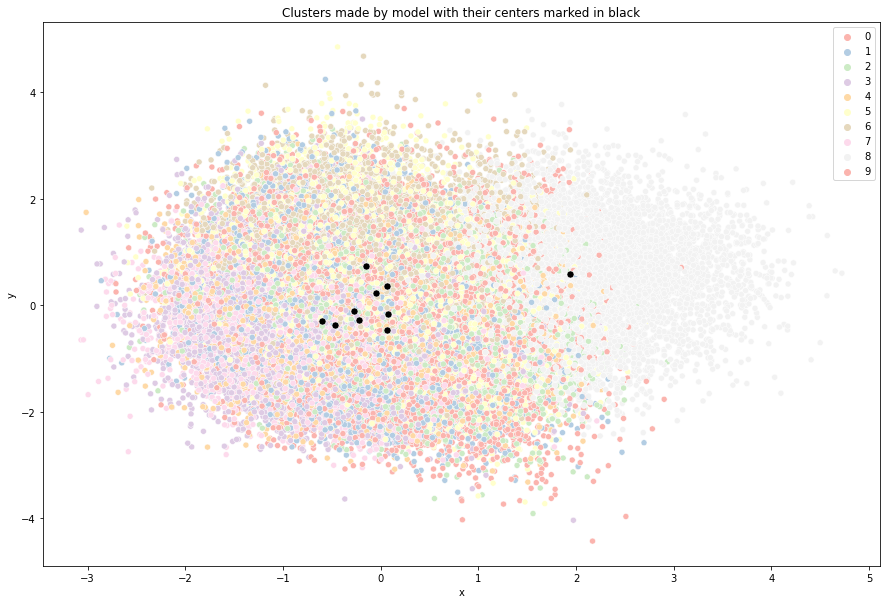

In [16]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x=df["x"], y=df["y"], hue=df["clusters"], palette='Pastel1')
sns.scatterplot(model.cluster_centers_[:, 0],model.cluster_centers_[:, 1], color = 'black', s = 50).set(title='Clusters made by model with their centers marked in black')

# **Submission**

In [17]:
sub_df = pd.read_csv('../input/tabular-playground-series-jul-2022/sample_submission.csv')

In [18]:
sub_df["Predicted"] = pred
sub_df.to_csv('submission.csv', index=False)
sub_df

,Id,Predicted
0,0,3
1,1,9
2,2,1
3,3,5
4,4,7
...,...,...
97995,97995,2
97996,97996,7
97997,97997,6
97998,97998,2


**Upvote notebook if ths helps !!**